<a href="https://colab.research.google.com/github/aqsa-isha/Predict-Bank-Marketing-Campaign-Success-/blob/main/bank_marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
bank_data = pd.read_csv('/content/bank_marketing.csv', sep =';')

In [7]:
# first five rows of dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Display last five rows of dataset
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
# Display the shape of dataset to understand its dimensions
bank_data.shape

(45211, 17)

In [10]:
# Check for missing values
bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
# Information of dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# Display summary statistics of dataset
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Convert categorical labels to numeric using Label Encoding



In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = bank_data.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    bank_data[column] = label_encoder.fit_transform(bank_data[column])
    label_encoders[column] = label_encoder

### Feature Selection


In [15]:
X = bank_data.drop(columns='y')
y = bank_data['y']

We are using **Correlation Analysis**, **Mutual Information Score**, and **SelectKBest** techniques we can choose features that have the most significant impact on the *target variable*, removing irrelevant features.

It helps improve model performance by reducing overfitting, enhancing accuracy, and speeding up computation.

### **Correlation Analysis**

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform correlation analysis to identify highly correlated features with the target variable 'y'
corr = bank_data.corr()['y'].sort_values(ascending=False)


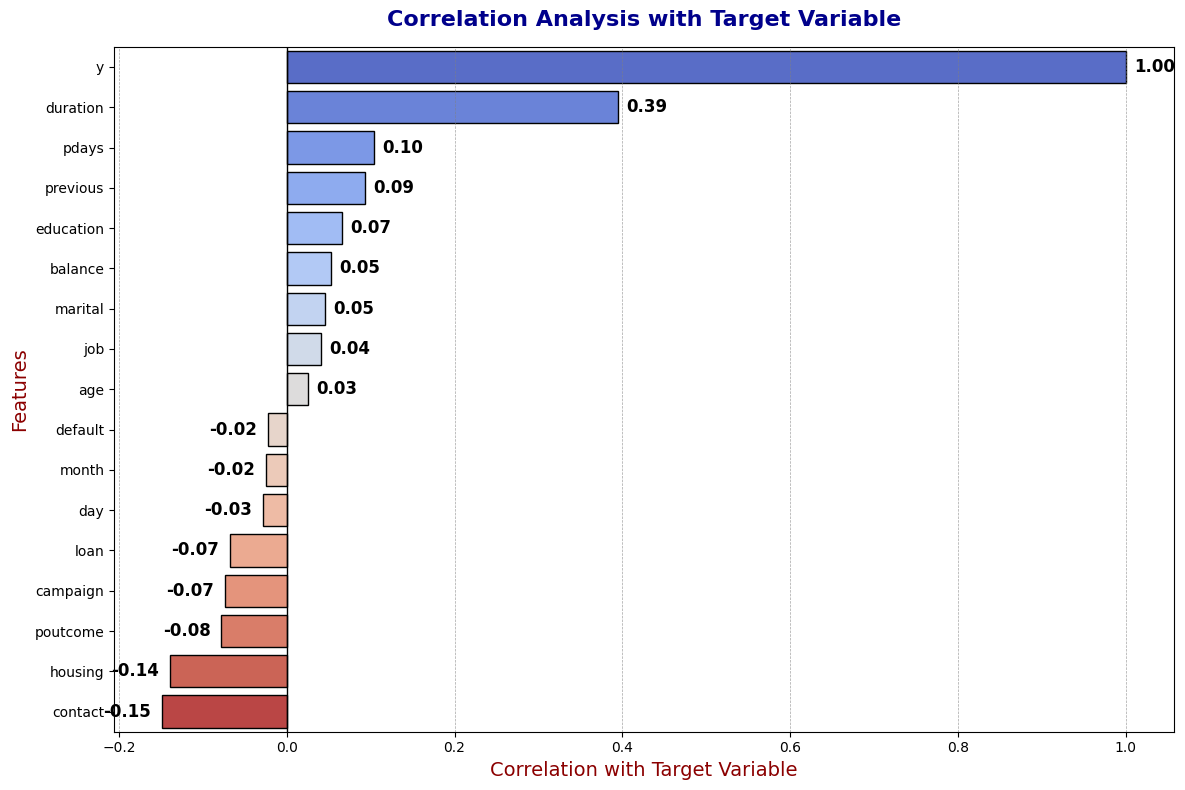

In [18]:
# Plotting correlation values of features with the target variable (horizontal bar plot)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=corr.values,
    y=corr.index,
    palette='coolwarm',
    edgecolor='black',
    saturation=0.8
)

# Add a title with custom font size and weight
plt.title('Correlation Analysis with Target Variable', fontsize=16, fontweight='bold', color='darkblue', pad=15)

# Customize x and y axis labels
plt.xlabel('Correlation with Target Variable', fontsize=14, fontweight='medium', color='darkred')
plt.ylabel('Features', fontsize=14, fontweight='medium', color='darkred')

# Annotate the bars with correlation values
for i, v in enumerate(corr.values):
    plt.text(v + 0.01 if v > 0 else v - 0.07, i, f"{v:.2f}", color='black', fontsize=12, fontweight='bold', va='center')

# Adjust the gridlines and style
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(0, color='black', linestyle='-', linewidth=1)  # Add a line for zero correlation

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Mutual Information Score

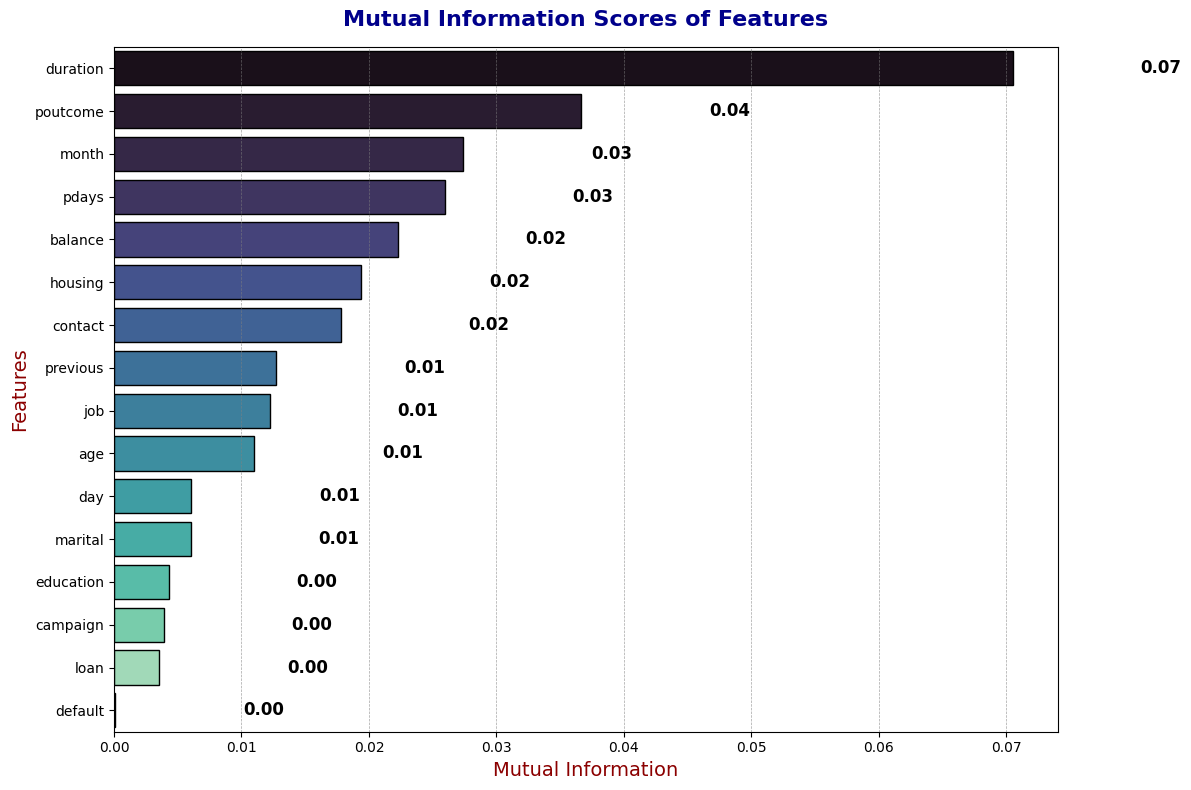

Top features based on Mutual Information : ['duration', 'poutcome', 'month', 'pdays', 'balance', 'housing', 'contact', 'previous', 'job', 'age']


In [20]:
# Plotting the mutual information scores for each feature
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Mutual Information',
    y='Feature',
    data=mutual_info_df,
    palette='mako',
    edgecolor='black',
    saturation=0.85
)

# Add title and axis labels with custom fonts and colors
plt.title('Mutual Information Scores of Features', fontsize=16, fontweight='bold', color='darkblue', pad=15)
plt.xlabel('Mutual Information', fontsize=14, fontweight='medium', color='darkred')
plt.ylabel('Features', fontsize=14, fontweight='medium', color='darkred')

# Add annotations on the bars for mutual information scores
for index, value in enumerate(mutual_info_df['Mutual Information']):
    plt.text(
        value + 0.01,
        index,
        f"{value:.2f}",
        color='black',
        fontsize=12,
        fontweight='bold',
        va='center'
    )

# Add gridlines for better readability
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to fit all labels and features
plt.tight_layout()

# Show the plot
plt.show()

# Selecting top 10 features based on Mutual Information Scores
selected_features_mi = mutual_info_df['Feature'].head(10).tolist()
print("Top features based on Mutual Information :", selected_features_mi)

### SelectKBest

In [21]:
# SelectKBest feature selection technique to identify the top 10 features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_kbest = selector.fit_transform(X, y)

# Extract the selected features from the original dataset
kbest_feat = X.columns[selector.get_support()].tolist()
print("Top features based on SelectKBest:", kbest_feat)

Top features based on SelectKBest: ['age', 'job', 'balance', 'housing', 'contact', 'month', 'duration', 'pdays', 'previous', 'poutcome']


### Combine and Declare Selected Features

In [22]:
# combine features selected from correlation analysis, mutual information and SelectKBest
combined_selected_features = set(strong_corr_feat + selected_features_mi + kbest_feat)
print("Combined Selected Features:", combined_selected_features)

# create a new DataFrame with the selected features
bank_data_selected = bank_data[list(combined_selected_features)]
X = bank_data_selected.drop(columns='y')
y = bank_data_selected['y']

Combined Selected Features: {'balance', 'job', 'poutcome', 'housing', 'duration', 'month', 'previous', 'contact', 'age', 'pdays', 'y'}


### Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Data Scaling and Splitting


In [24]:
# Scale the features using StandardScaler to Standardize the dataset for better model performance
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Shape of the training data to check the number of samples and features
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (33908, 10)
Shape of y_train: (33908,)


### Model Initialization

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}


In [26]:
# Create a dictionary to store model performance scores
model_scores = {}

# Evaluate models with 5-fold cross-validation and record mean accuracy
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_scores[model_name] = scores.mean()

# Display the cross-validation accuracy score for each model
print("Cross-Validation Accuracy Scores:")
for model_name, score in model_scores.items():
    print(f"{model_name}: {score:.2f}")

Cross-Validation Accuracy Scores:
Logistic Regression: 0.89
Decision Tree: 0.87
XGBoost: 0.90


### XGBoost is the best choice for this dataset.







### Feature Importance Calculation and Visualization

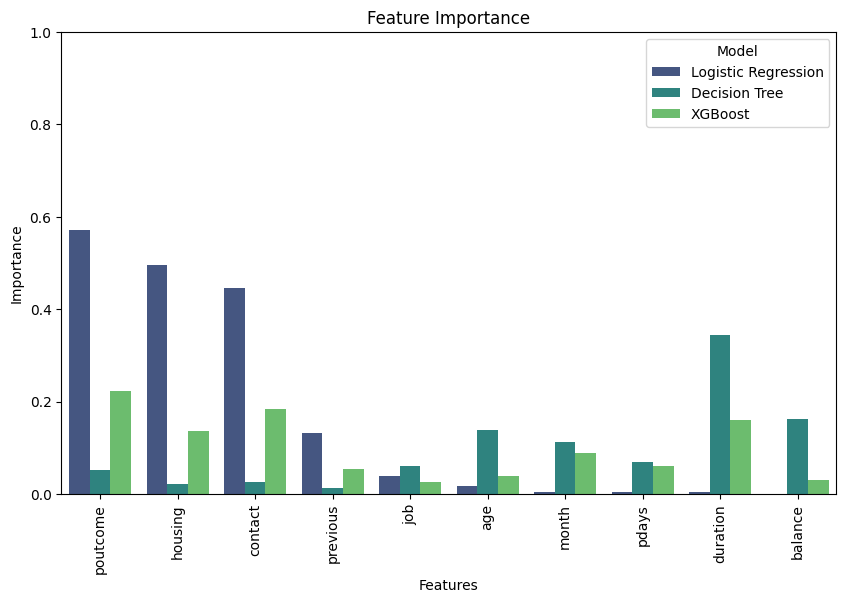

In [27]:
# Creating an empty list to store feature importance data for each model
model_importance_list = []

# loop through each model to calculate and store feature importance
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Calculate feature importance based on the model type
    if model_name == 'Logistic Regression':
        # Logistic Regression uses coefficients as feature importance
        LR_importance = np.abs(model.coef_[0])  # absolute values of the coefficients
        feature_importance  = pd.DataFrame({'Model':[model_name] * len(X_train.columns), 'Feature': X_train.columns, 'Importance': LR_importance}).sort_values(by='Importance', ascending=False)
    else:
      # Decision Tree and XGBoost use the 'feature_importances' attribute for feature importance
      feature_importance = pd.DataFrame({'Model':[model_name] * len(X_train.columns), 'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    # append each model's feature importance data to the list
    model_importance_list.append(feature_importance)

# Concatenate all the model's feature importance data into a single DataFrame
model_importance = pd.concat(model_importance_list, axis = 0, ignore_index=True)

# plot feature importance for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', hue='Model', data=model_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.ylim(0, 1)
plt.show()

### Model Evaluation

Compare model performances using accuracy, precision, recall, and F1-score.


In [28]:
from tabulate import tabulate

evaluation_metrics = {}

# Loop through each model to train and evaluate its performance on the test set
for model_name, model in models.items():
    # Train the model using the training dataset
    model.fit(X_train, y_train)
    # Make predictions on the test set using the trained model
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics to assess model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics for the current model
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert the evaluation metrics dictionary into a DataFrame
evaluation_metrics_df = pd.DataFrame(evaluation_metrics).T.round(2)

# Sort the DataFrame by Accuracy, Precision, Recall, and F1-Score in descending order
evaluation_metrics_df.sort_values(by=['Accuracy', 'Precision', 'Recall', 'F1-Score'], ascending=False, inplace=True)

# Use tabulate to print the DataFrame in a table format
print("\nModel Evaluation Metrics:")
print(tabulate(evaluation_metrics_df, headers="keys", tablefmt="fancy_grid"))

# Save the evaluation metrics DataFrame to a CSV file
evaluation_metrics_df.to_csv('evaluation_metrics.csv')



Model Evaluation Metrics:
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                     │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ XGBoost             │       0.9  │        0.62 │     0.46 │       0.53 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression │       0.88 │        0.52 │     0.19 │       0.28 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │       0.87 │        0.45 │     0.46 │       0.46 │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╛


### XGBoost is the best model overall in this case. It achieves the highest accuracy, precision, and F1-score, making it the most suitable choice for your problem.